## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  65.884064  1059.589855  0.000015  4.286316    65.879248
1  39.649047   535.776404  0.837887  1.998077   450.723055
2   5.540887  1083.543692  0.543146  7.533664   588.543128
3  87.628022  1295.530398  0.555965  4.146727   725.692925
4  19.078940  1348.408220  0.882680  2.543098  1190.576181


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9573769	total: 57.3ms	remaining: 57.2s
1:	learn: 0.9479769	total: 57.8ms	remaining: 28.9s
2:	learn: 0.9397440	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9295218	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9163242	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9062486	total: 59.8ms	remaining: 9.9s
6:	learn: 0.8953464	total: 60.2ms	remaining: 8.54s
7:	learn: 0.8854680	total: 60.8ms	remaining: 7.54s
8:	learn: 0.8727500	total: 61.4ms	remaining: 6.76s
9:	learn: 0.8602642	total: 61.8ms	remaining: 6.12s
10:	learn: 0.8503427	total: 62.2ms	remaining: 5.59s
11:	learn: 0.8387318	total: 62.5ms	remaining: 5.15s
12:	learn: 0.8275679	total: 63ms	remaining: 4.79s
13:	learn: 0.8153500	total: 63.5ms	remaining: 4.47s
14:	learn: 0.8042308	total: 63.9ms	remaining: 4.19s
15:	learn: 0.7960142	total: 64.2ms	remaining: 3.95s
16:	learn: 0.7857149	total: 64.6ms	remaining: 3.74s
17:	learn: 0.7759318	total: 65.1ms	remaining: 3.55s
18:	learn: 0.7686454	total: 65.5ms	remaining: 3

80:	learn: 0.3645256	total: 92.3ms	remaining: 1.05s
81:	learn: 0.3601056	total: 92.8ms	remaining: 1.04s
82:	learn: 0.3560247	total: 93.1ms	remaining: 1.03s
83:	learn: 0.3517989	total: 93.6ms	remaining: 1.02s
84:	learn: 0.3486098	total: 93.9ms	remaining: 1.01s
85:	learn: 0.3449246	total: 94.2ms	remaining: 1s
86:	learn: 0.3417682	total: 94.6ms	remaining: 993ms
87:	learn: 0.3383848	total: 94.9ms	remaining: 983ms
88:	learn: 0.3345729	total: 95.3ms	remaining: 976ms
89:	learn: 0.3316385	total: 95.7ms	remaining: 967ms
90:	learn: 0.3288760	total: 96.1ms	remaining: 960ms
91:	learn: 0.3252416	total: 96.4ms	remaining: 952ms
92:	learn: 0.3217807	total: 96.7ms	remaining: 943ms
93:	learn: 0.3183123	total: 97.1ms	remaining: 936ms
94:	learn: 0.3150331	total: 97.6ms	remaining: 929ms
95:	learn: 0.3119713	total: 98ms	remaining: 923ms
96:	learn: 0.3089819	total: 98.5ms	remaining: 917ms
97:	learn: 0.3057732	total: 99ms	remaining: 911ms
98:	learn: 0.3018575	total: 99.4ms	remaining: 905ms
99:	learn: 0.297840

288:	learn: 0.0592466	total: 185ms	remaining: 455ms
289:	learn: 0.0588449	total: 185ms	remaining: 454ms
290:	learn: 0.0586201	total: 186ms	remaining: 453ms
291:	learn: 0.0581205	total: 186ms	remaining: 451ms
292:	learn: 0.0578341	total: 187ms	remaining: 450ms
293:	learn: 0.0575052	total: 187ms	remaining: 449ms
294:	learn: 0.0571139	total: 187ms	remaining: 448ms
295:	learn: 0.0569353	total: 188ms	remaining: 447ms
296:	learn: 0.0565648	total: 188ms	remaining: 445ms
297:	learn: 0.0562393	total: 189ms	remaining: 444ms
298:	learn: 0.0558568	total: 189ms	remaining: 443ms
299:	learn: 0.0555154	total: 189ms	remaining: 442ms
300:	learn: 0.0551567	total: 190ms	remaining: 441ms
301:	learn: 0.0548120	total: 190ms	remaining: 440ms
302:	learn: 0.0545920	total: 191ms	remaining: 439ms
303:	learn: 0.0542980	total: 191ms	remaining: 438ms
304:	learn: 0.0539926	total: 191ms	remaining: 436ms
305:	learn: 0.0537184	total: 192ms	remaining: 435ms
306:	learn: 0.0534010	total: 192ms	remaining: 434ms
307:	learn: 

486:	learn: 0.0264975	total: 271ms	remaining: 286ms
487:	learn: 0.0263781	total: 272ms	remaining: 285ms
488:	learn: 0.0262768	total: 272ms	remaining: 285ms
489:	learn: 0.0262502	total: 273ms	remaining: 284ms
490:	learn: 0.0261344	total: 273ms	remaining: 283ms
491:	learn: 0.0259912	total: 274ms	remaining: 283ms
492:	learn: 0.0259654	total: 274ms	remaining: 282ms
493:	learn: 0.0259400	total: 274ms	remaining: 281ms
494:	learn: 0.0259119	total: 275ms	remaining: 280ms
495:	learn: 0.0257995	total: 275ms	remaining: 280ms
496:	learn: 0.0256364	total: 276ms	remaining: 279ms
497:	learn: 0.0255233	total: 276ms	remaining: 278ms
498:	learn: 0.0253640	total: 276ms	remaining: 278ms
499:	learn: 0.0253367	total: 277ms	remaining: 277ms
500:	learn: 0.0253097	total: 277ms	remaining: 276ms
501:	learn: 0.0252193	total: 278ms	remaining: 276ms
502:	learn: 0.0251931	total: 278ms	remaining: 275ms
503:	learn: 0.0250816	total: 279ms	remaining: 274ms
504:	learn: 0.0249565	total: 279ms	remaining: 273ms
505:	learn: 

708:	learn: 0.0118009	total: 363ms	remaining: 149ms
709:	learn: 0.0117569	total: 363ms	remaining: 148ms
710:	learn: 0.0117511	total: 364ms	remaining: 148ms
711:	learn: 0.0117453	total: 364ms	remaining: 147ms
712:	learn: 0.0116992	total: 364ms	remaining: 147ms
713:	learn: 0.0116321	total: 365ms	remaining: 146ms
714:	learn: 0.0115665	total: 365ms	remaining: 145ms
715:	learn: 0.0115024	total: 365ms	remaining: 145ms
716:	learn: 0.0114396	total: 366ms	remaining: 144ms
717:	learn: 0.0113966	total: 366ms	remaining: 144ms
718:	learn: 0.0113542	total: 366ms	remaining: 143ms
719:	learn: 0.0113486	total: 367ms	remaining: 143ms
720:	learn: 0.0112875	total: 367ms	remaining: 142ms
721:	learn: 0.0112459	total: 368ms	remaining: 142ms
722:	learn: 0.0112404	total: 368ms	remaining: 141ms
723:	learn: 0.0112350	total: 368ms	remaining: 140ms
724:	learn: 0.0111762	total: 369ms	remaining: 140ms
725:	learn: 0.0111187	total: 369ms	remaining: 139ms
726:	learn: 0.0110624	total: 370ms	remaining: 139ms
727:	learn: 

910:	learn: 0.0066556	total: 449ms	remaining: 43.9ms
911:	learn: 0.0066452	total: 450ms	remaining: 43.4ms
912:	learn: 0.0066229	total: 450ms	remaining: 42.9ms
913:	learn: 0.0066126	total: 451ms	remaining: 42.4ms
914:	learn: 0.0065926	total: 451ms	remaining: 41.9ms
915:	learn: 0.0065825	total: 452ms	remaining: 41.4ms
916:	learn: 0.0065614	total: 452ms	remaining: 40.9ms
917:	learn: 0.0065417	total: 453ms	remaining: 40.4ms
918:	learn: 0.0065304	total: 453ms	remaining: 39.9ms
919:	learn: 0.0065111	total: 454ms	remaining: 39.4ms
920:	learn: 0.0064916	total: 454ms	remaining: 38.9ms
921:	learn: 0.0064699	total: 455ms	remaining: 38.5ms
922:	learn: 0.0064587	total: 455ms	remaining: 37.9ms
923:	learn: 0.0064384	total: 455ms	remaining: 37.5ms
924:	learn: 0.0064198	total: 456ms	remaining: 36.9ms
925:	learn: 0.0064087	total: 456ms	remaining: 36.5ms
926:	learn: 0.0063979	total: 457ms	remaining: 36ms
927:	learn: 0.0063796	total: 457ms	remaining: 35.5ms
928:	learn: 0.0063688	total: 458ms	remaining: 35

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

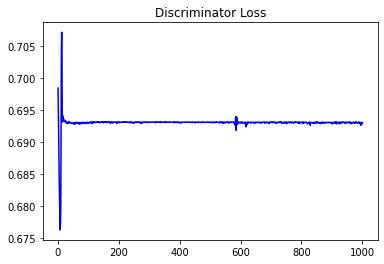

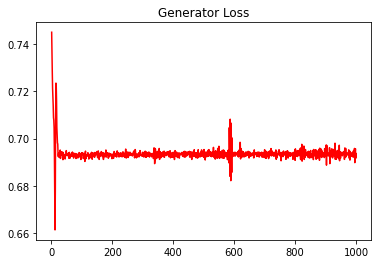

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.013649426807602515


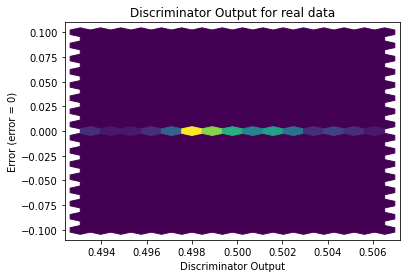

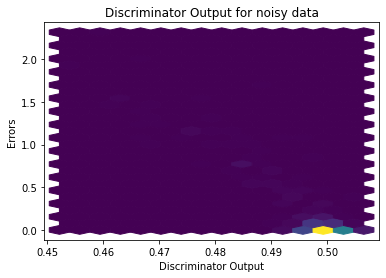

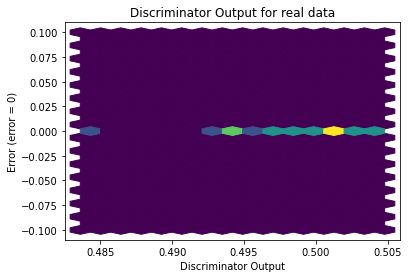

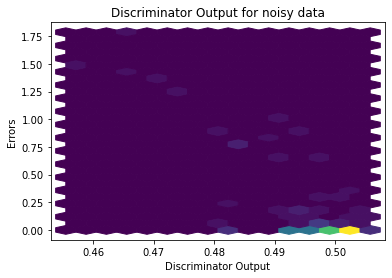

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


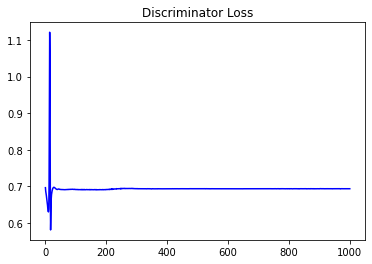

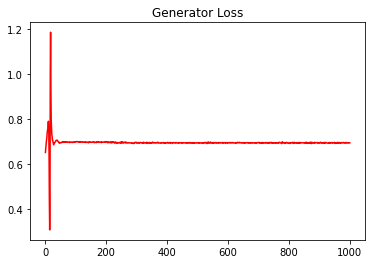

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.014539134087695233


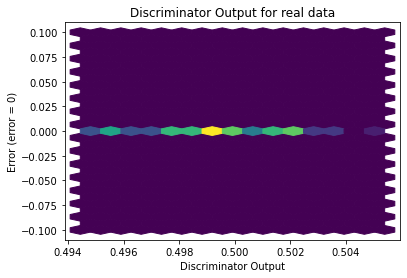

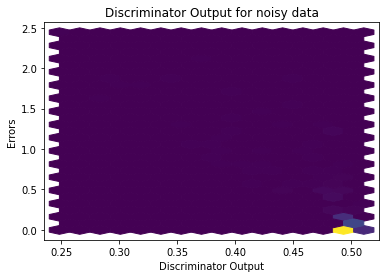

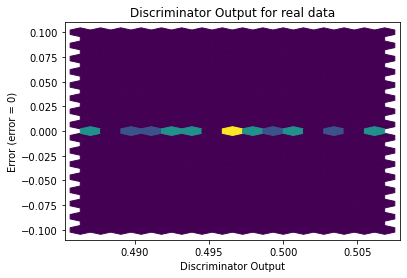

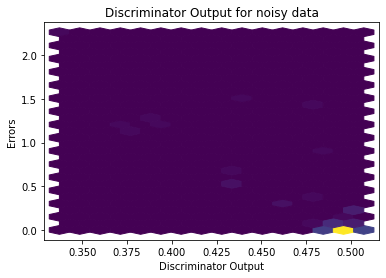

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0663]], requires_grad=True)
